<a href="https://colab.research.google.com/github/Sondos-Omar/Adagrad-RMSProp-Adam-implemetation/blob/main/normalizing_layers_argmin_crossentropy_exponential_loss_plus_constant_vanishing_gradient_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9912422/9912422 [00:00<00:00, 111206928.93it/s]


Extracting ./mnist//mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist//mnist_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28131837.86it/s]


Extracting ./mnist//mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist//mnist_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34177360.34it/s]


Extracting ./mnist//mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist//mnist_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3453685.42it/s]


Extracting ./mnist//mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist//mnist_data/MNIST/raw

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


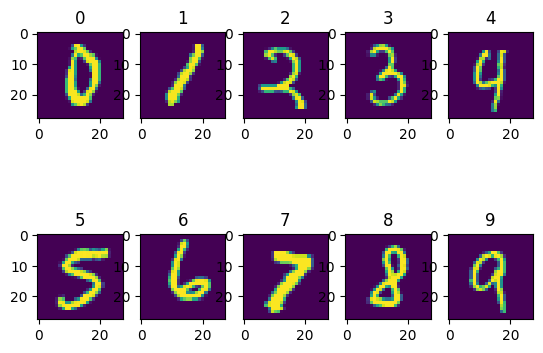

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def extract_data_from_loader(loader):
    """
    Function extracts data from loader

    Args:
        loader : pytorch data oader

    Returns:
        x,y : image and label of data
    """
    x = np.array([])
    y = np.array([])
    for curr_batch in loader:
        if x.shape[0] == 0:
            x = curr_batch[0]
            y = curr_batch[1]
        else:
            x = np.concatenate([x, curr_batch[0]], axis=0)
            y = np.concatenate([y, curr_batch[1]], axis=0)
    return x, y

def get_dataset(dataset='mnist', used_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], training_size=60000, test_size=10000, validation_size=1000, root="./mnist/"):
    """
    Reads and converts data from the MNIST dataset.

    :param  dataset         'mnist' or 'cifar10'
    :param  used_labels     list of digit classes to include into the returned subset
    :param  training_size   number of images from training size
    :param  test_size       number of images from test_size
    :param  validation_size number of images from validation_size
    :param  root            root directory for dataset

    :return x_train, y_train, x_test, y_test, x_val, y_val, class_names
      x_train, x_test, x_val: training, test, and validation images (uint8 [0- 255], shape: training_size x 28 x 28, test_size x 28 x 28, validation_size x 28 x 28),
      y_train, y_test, y_val: corresponding labels (int32 [0 - len(used_labels)), shape: training_size / test_size / validation_size)
      class_names: array with names of classes (size: len(used_labels))
    """

    num_classes = len(used_labels)
    max_num_classes = 10

    np.random.seed(4711)

    if dataset == 'mnist':
        trainset = torchvision.datasets.MNIST(root=f"{root}/mnist_data", train=True, download=True,
                                              transform=torchvision.transforms.ToTensor())
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=training_size, shuffle=False, num_workers=2)
        x_train, y_train = extract_data_from_loader(trainloader)
        x_train = x_train.transpose([0, 2, 3, 1]).squeeze()
        x_train = (x_train * 255).astype(np.uint8)

        testset = torchvision.datasets.MNIST(root=f"{root}/mnist_data", train=False, download=True,
                                              transform=torchvision.transforms.ToTensor())
        testloader = torch.utils.data.DataLoader(testset, batch_size=test_size, shuffle=False, num_workers=2)
        x_test, y_test = extract_data_from_loader(testloader)
        x_test = x_test.transpose([0, 2, 3, 1]).squeeze()
        x_test = (x_test * 255).astype(np.uint8)

        # Splitting training set into training and validation
        x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=validation_size, random_state=42)

        class_names = list(map(str, used_labels))

    elif dataset == 'cifar10':
        trainset = torchvision.datasets.CIFAR10(root=f"{root}/cifar10_data", train=True, download=True,
                                            transform=torchvision.transforms.ToTensor())
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=training_size, shuffle=False, num_workers=2)
        x_train, y_train = extract_data_from_loader(trainloader)
        x_train = x_train.transpose([0, 2, 3, 1]).squeeze()
        x_train = (x_train * 255).astype(np.uint8)

        testset = torchvision.datasets.CIFAR10(root=f"{root}/cifar10_data", train=False, download=True,
                                            transform=torchvision.transforms.ToTensor())
        testloader = torch.utils.data.DataLoader(testset, batch_size=test_size, shuffle=False, num_workers=2)
        x_test, y_test = extract_data_from_loader(testloader)
        x_test = x_test.transpose([0, 2, 3, 1]).squeeze()
        x_test = (x_test * 255).astype(np.uint8)

        # Splitting training set into training and validation
        x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=validation_size, random_state=42)

        class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        class_names = [class_names[idx] for idx in used_labels]


    else:
        raise ValueError('The variable dataset must either be set to "mnist" or "cifar10"')

    x_train = x_train.astype(np.float32)
    x_test = x_test.astype(np.float32)
    x_val = x_val.astype(np.float32)

    return x_train, y_train, x_test, y_test, x_val, y_val, class_names

if __name__ == '__main__':

    x_train, y_train, x_test, y_test, x_val, y_val, class_names = get_dataset(dataset='mnist', training_size=6000, validation_size=1000, test_size=1000)
    print(class_names)
    # Show one example of each class
    plt.figure()
    for class_id in range(len(class_names)):
        plt.subplot(2, 5, class_id + 1)
        plt.imshow(x_train[y_train == class_id][0].astype(np.uint8))
        plt.title(class_names[class_id])
    plt.show()


# Vanishing Gradient Poblem

Here the vanishing gradient problem effect is visualized by using two activation functions Sigmoid and Relu.

This project uses MNIST dataset which contains binary images of handwritten digits, thus has class from 0 to 9.

In [ ]:
import torch
from torch import nn
import numpy as np
import copy
import random
import matplotlib.pyplot as plt

# from dataset import get_dataset
random.seed(0)

used_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
training_size = 2500
test_size = 1000
num_classes = len(used_labels)

# extracting split dataset
# Assuming get_dataset returns only x_train, y_train, x_test, y_test
#x_train, y_train, x_test, y_test = get_dataset('mnist', used_labels, training_size, test_size)
x_train, y_train, x_test, y_test, x_val, y_val, class_names = get_dataset(dataset='mnist', training_size=6000, validation_size=1000, test_size=1000)

In [ ]:
# Normalizing the data

def normalize_data(x_train,x_test):
    x_train_vectors = x_train.reshape((x_train.shape[0], -1))
    mu = np.mean(x_train_vectors, axis=0) # mean of distribution
    sigma = np.std(x_train_vectors) # standard deviation of distribution
    x_train_vectors_normalized = torch.tensor((x_train_vectors-mu)/sigma)

    x_test_vectors = x_test.reshape((x_test.shape[0], -1))
    x_test_vectors_normalized= torch.tensor((x_test_vectors-mu)/sigma)
    x_train =x_train_vectors_normalized
    x_test = x_test_vectors_normalized
    return x_train,x_test

x_train,x_test= normalize_data(x_train,x_test)

We will demonstrate the vanishing gradient problem using models based on mutilayer perceptrons with different number of hidden layers.

Here we build models with one, two, three and eight hidden layers with 20 hidden neurons.

In [ ]:

class MLP(nn.Module):
    def __init__(self,input_size,hidden_size,output_size,activation,num_lay,):
        super().__init__()
        self.activation = activation
        self.in_size = input_size
        self.hidden_size = hidden_size # number of neurons in hidden layer
        self.output_size = output_size
        self.num_layers = num_lay # number of hidden layers
        self.layers = self.make_layer()


    def make_layer(self):
        layers = []
        layers.append(nn.Linear(self.in_size,self.hidden_size))
        layers.append(self.activation)
        for i in range(self.num_layers-1):
            layers.append(nn.Linear(self.hidden_size,self.hidden_size))
            layers.append(self.activation)
        layers.append(nn.Linear(self.hidden_size,self.output_size))
        return nn.Sequential(*layers)

    def forward(self,inputs):
        return self.layers(inputs)

# hidden_neurons = 20
# model1 = MLP(x_train.shape[1],hidden_neurons,num_classes,nn.Sigmoid(),num_lay=8)
# print(model1)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import numpy as np
# C=50

# # Define your MLP class (assuming you have defined it elsewhere)
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, activation, num_lay):
#         super(MLP, self).__init__()
#         self.num_lay = num_lay
#         self.layers = nn.ModuleList()
#         self.layers.append(nn.Linear(input_size, hidden_size))
#         self.layers.append(nn.LayerNorm(hidden_size))  # Add normalization layer after input layer
#         self.layers.append(activation)
#         for _ in range(self.num_lay-2):
#             self.layers.append(nn.Linear(hidden_size, hidden_size))
#             self.layers.append(nn.LayerNorm(hidden_size))  # Add normalization layer after hidden layers
#             self.layers.append(activation)
#         self.layers.append(nn.Linear(hidden_size, output_size))

#     def forward(self, x):
#         for layer in self.layers:
#             x = layer(x)
#         return x

# def main(epoches, models, train_loader, test_loader):
#     model_weights_epoch = []
#     for idx, model in enumerate(models):
#         print(f"------------Model{idx+1}------------")
#         initial_weights = {}
#         saved_weights = weights_saver(model, initial_weights)
#         for i in range(epoches):
#             model.train()
#             mean_loss = training_step(train_loader, model, idx)
#             saved_weights = weights_saver(model, saved_weights)
#             if i % 10 == 0:
#                 print(f"Epoch : {i}, train_loss: {mean_loss}")

#         model_weights_epoch.append(saved_weights)
#         accuracy, testing_loss = testing(model, test_loader)
#         print(f"Testing_accuracy : {accuracy}")
#     return model_weights_epoch

# def training_step(train_loader, model, cnt):
#     optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)
#     temp_loss = []
#     for i, (x, y) in enumerate(train_loader):
#         x.requires_grad = True
#         optimizer.zero_grad()
#         output = model.forward(x)

#         # One-hot encode the target tensor y
#         num_classes = output.size(1)
#         y_onehot = F.one_hot(y, num_classes=num_classes)
#         y_onehot = y_onehot.float().view(-1, num_classes)

#         # Compute the standard CrossEntropy
#         loss_function = nn.CrossEntropyLoss()
#         standard_loss = loss_function(output, y_onehot)

#         # Compute the custom loss as the arg min of the standard loss
#         custom_loss, _ = torch.min(torch.exp(standard_loss)+ C, dim=0)

#         # Backpropagate and optimize
#         custom_loss.backward()
#         optimizer.step()
#         temp_loss.append(torch.mean(custom_loss).item())
#     train_loss = np.mean((temp_loss))
#     return train_loss


# def weights_saver(model, weights_dict):
#     cntr = 1
#     for idx, param in enumerate(model.named_parameters()):
#         if idx % 2 == 0:
#             key = "layer" + str(cntr)
#             if key not in weights_dict:
#                 weights_dict[key] = []
#             weights_dict[key].append(param[1][1].clone())
#             cntr += 1
#     return weights_dict

# def testing(model, test_loader):
#     total_preds, true_preds = 0, 0
#     temp_loss = []
#     model.eval()
#     with torch.no_grad():
#         for indx, (x, y) in enumerate(test_loader):
#             output = model(x)

#             # One-hot encode the target tensor y
#             num_classes = output.size(1)
#             y_onehot = F.one_hot(y, num_classes=num_classes)
#             y_onehot = y_onehot.float().view(-1, num_classes)

#             # Compute the standard CrossEntropy
#             loss_function = nn.CrossEntropyLoss()
#             standard_loss = loss_function(output, y_onehot)

#             # Compute the custom loss as the arg min of the standard loss
#             custom_loss, _ = torch.min(torch.exp(standard_loss)+ C, dim=0)

#             temp_loss.append(custom_loss.item())
#             _, predicted = torch.max(output.data, 1)
#             total_preds += y.shape[0]
#             true_preds += torch.sum(predicted == y).item()
#         testing_loss = np.mean(temp_loss)
#     accuracy = (true_preds / total_preds) * 100
#     return accuracy, testing_loss



# epoches = 100
# hidden_neurons = 20
# num_classes = 10
# lr_rate = 0.001

# model1 = MLP(x_train.shape[1], hidden_neurons, num_classes, nn.Sigmoid(), num_lay=1)
# model2 = MLP(x_train.shape[1], hidden_neurons, num_classes, nn.Sigmoid(), num_lay=2)
# model3 = MLP(x_train.shape[1], hidden_neurons, num_classes, nn.Sigmoid(), num_lay=3)
# model4 = MLP(x_train.shape[1], hidden_neurons, num_classes, nn.Sigmoid(), num_lay=8)

# train_dataset = [[x_train[indx], y_train[indx]] for indx, i in enumerate(x_train)]
# test_dataset = [[x_test[indx], y_test[indx]] for indx, i in enumerate(x_test)]

# train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=16)
# test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=16)

# #####models = [model1, model2, model3, model4]
# models = [ model4]


# grad_epoch = main(epoches, models, train_loader, test_loader)
# gradients_sig_1 = grad_epoch[0]
# # gradients_sig_2 = grad_epoch[1]
# # gradients_sig_3 = grad_epoch[2]
# # gradients_sig_4 = grad_epoch[3]


In [ ]:
!pip install mlflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packa

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import mlflow

C = 50

# Define your MLP class (assuming you have defined it elsewhere)
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation, num_lay):
        super(MLP, self).__init__()
        self.num_lay = num_lay
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        self.layers.append(nn.LayerNorm(hidden_size))  # Add normalization layer after input layer
        self.layers.append(activation)
        for _ in range(self.num_lay - 2):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
            self.layers.append(nn.LayerNorm(hidden_size))  # Add normalization layer after hidden layers
            self.layers.append(activation)
        self.layers.append(nn.Linear(hidden_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x


def main(epoches, models, train_loader, test_loader):
    model_weights_epoch = []
    for idx, model in enumerate(models):
        print(f"------------Model{idx + 1}------------")
        with mlflow.start_run(nested=True):
            mlflow.log_param("Model", idx + 1)
            initial_weights = {}
            saved_weights = weights_saver(model, initial_weights)
            for i in range(epoches):
                model.train()
                mean_loss = training_step(train_loader, model, idx)
                mlflow.log_metric("Mean Loss", mean_loss, step=i)
                saved_weights = weights_saver(model, saved_weights)
                if i % 10 == 0:
                    print(f"Epoch : {i}, train_loss: {mean_loss}")

            model_weights_epoch.append(saved_weights)
            accuracy, testing_loss = testing(model, test_loader)
            mlflow.log_metric("Accuracy", accuracy)
            mlflow.log_metric("Testing Loss", testing_loss)
            print(f"Testing_accuracy : {accuracy}")

    return model_weights_epoch



def training_step(train_loader, model, cnt):
    optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)
    temp_loss = []
    for i, (x, y) in enumerate(train_loader):
        x.requires_grad = True
        optimizer.zero_grad()
        output = model.forward(x)

        # One-hot encode the target tensor y
        num_classes = output.size(1)
        y_onehot = F.one_hot(y, num_classes=num_classes)
        y_onehot = y_onehot.float().view(-1, num_classes)

        # Compute the standard CrossEntropy
        loss_function = nn.CrossEntropyLoss()
        standard_loss = loss_function(output, y_onehot)

        # Compute the custom loss as the arg min of the standard loss
        custom_loss, _ = torch.min(torch.exp(standard_loss) + C, dim=0)

        # Backpropagate and optimize
        custom_loss.backward()
        optimizer.step()
        temp_loss.append(torch.mean(custom_loss).item())
    train_loss = np.mean((temp_loss))
    return train_loss


def weights_saver(model, weights_dict):
    cntr = 1
    for idx, param in enumerate(model.named_parameters()):
        if idx % 2 == 0:
            key = "layer" + str(cntr)
            if key not in weights_dict:
                weights_dict[key] = []
            weights_dict[key].append(param[1][1].clone())
            cntr += 1
    return weights_dict


def testing(model, test_loader):
    total_preds, true_preds = 0, 0
    temp_loss = []
    model.eval()
    with torch.no_grad():
        for indx, (x, y) in enumerate(test_loader):
            output = model(x)

            # One-hot encode the target tensor y
            num_classes = output.size(1)
            y_onehot = F.one_hot(y, num_classes=num_classes)
            y_onehot = y_onehot.float().view(-1, num_classes)

            # Compute the standard CrossEntropy
            loss_function = nn.CrossEntropyLoss()
            standard_loss = loss_function(output, y_onehot)

            # Compute the custom loss as the arg min of the standard loss
            custom_loss, _ = torch.min(torch.exp(standard_loss) + C, dim=0)

            temp_loss.append(custom_loss.item())
            _, predicted = torch.max(output.data, 1)
            total_preds += y.shape[0]
            true_preds += torch.sum(predicted == y).item()
        testing_loss = np.mean(temp_loss)
    accuracy = (true_preds / total_preds) * 100
    return accuracy, testing_loss


epoches = 100
hidden_neurons = 20
num_classes = 10
lr_rate = 0.001

model1 = MLP(x_train.shape[1], hidden_neurons, num_classes, nn.Sigmoid(), num_lay=1)
model2 = MLP(x_train.shape[1], hidden_neurons, num_classes, nn.Sigmoid(), num_lay=2)
model3 = MLP(x_train.shape[1], hidden_neurons, num_classes, nn.Sigmoid(), num_lay=3)
model4 = MLP(x_train.shape[1], hidden_neurons, num_classes, nn.Sigmoid(), num_lay=8)

train_dataset = [[x_train[indx], y_train[indx]] for indx, i in enumerate(x_train)]
test_dataset = [[x_test[indx], y_test[indx]] for indx, i in enumerate(x_test)]

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=16)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=16)

models = [model1, model2, model3, model4]
#models = [ model4]


grad_epoch = main(epoches, models, train_loader, test_loader)
gradients_sig_1 = grad_epoch[0]
gradients_sig_2 = grad_epoch[1]
gradients_sig_3 = grad_epoch[2]
gradients_sig_4 = grad_epoch[3]



------------Model1------------
Epoch : 0, train_loss: 54.70298305250817
Epoch : 10, train_loss: 51.4780335550453
Epoch : 20, train_loss: 51.360539235675674
Epoch : 30, train_loss: 51.30999879257798
Epoch : 40, train_loss: 51.279388101912886
Epoch : 50, train_loss: 51.25730561486035
Epoch : 60, train_loss: 51.241540791931484
Epoch : 70, train_loss: 51.228479161955526
Epoch : 80, train_loss: 51.21707276098123
Epoch : 90, train_loss: 51.20757213125001
Testing_accuracy : 93.92
------------Model2------------
Epoch : 0, train_loss: 54.75663410091607
Epoch : 10, train_loss: 51.49055200853989
Epoch : 20, train_loss: 51.36841004117192
Epoch : 30, train_loss: 51.31503563485797
Epoch : 40, train_loss: 51.28124573535878
Epoch : 50, train_loss: 51.258542355642916
Epoch : 60, train_loss: 51.241315034878745
Epoch : 70, train_loss: 51.227987152893995
Epoch : 80, train_loss: 51.21590244020143
Epoch : 90, train_loss: 51.205670271933464
Testing_accuracy : 93.96
------------Model3------------
Epoch : 0, t

In [ ]:
# calculates difference of weights between epochs and stores gradients
gradients_sig_models = [gradients_sig_1,gradients_sig_2,gradients_sig_3,gradients_sig_4]
for model in gradients_sig_models:
    layers_list = [keys for keys in model.keys()]
    for layer in layers_list:
        model[layer]= np.array([[float(torch.mean(torch.abs((model[layer][i+1]-model[layer][i])/lr_rate))),\
                        float(torch.std(torch.abs((model[layer][i+1]-model[layer][i])/lr_rate)))] \
                       for i in range(len(model[layer])-1)])

<ipython-input-14-1300ee0689f1>:7: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  float(torch.std(torch.abs((model[layer][i+1]-model[layer][i])/lr_rate)))] \


In [ ]:
epoches = 51
hidden_neurons = 20

# Models with Relu activation function
relu_model1 = MLP(x_train.shape[1],hidden_neurons,num_classes,nn.ReLU(),num_lay=1) #model with 1 hidden layers
relu_model2 = MLP(x_train.shape[1],hidden_neurons,num_classes,nn.ReLU(),num_lay=2) #model with 2 hidden layers
relu_model3 = MLP(x_train.shape[1],hidden_neurons,num_classes,nn.ReLU(),num_lay=3) #model with 3 hidden layers
relu_model4 = MLP(x_train.shape[1],hidden_neurons,num_classes,nn.ReLU(),num_lay=8) #model with 8 hidden layers

train_dataset = [[x_train[indx],y_train[indx]]for indx,i in enumerate(x_train)]
test_dataset = [[x_test[indx],y_test[indx]]for indx,i in enumerate(x_test)]

train_loader = torch.utils.data.DataLoader(train_dataset,shuffle=True,batch_size=16)
test_loader = torch.utils.data.DataLoader(test_dataset,shuffle=True,batch_size=16)

models = [relu_model1,relu_model2,relu_model3,relu_model4]

grad_epoch = main(epoches,models,train_loader,test_loader)

gradients_relu_1 = grad_epoch[0]
gradients_relu_2= grad_epoch[1]
gradients_relu_3 = grad_epoch[2]
gradients_relu_4 = grad_epoch[3]

gradients_relu_models = [gradients_relu_1,gradients_relu_2,gradients_relu_3,gradients_relu_4]

for model in gradients_relu_models:
    layers_list = [keys for keys in model.keys()]
    for layer in layers_list:
         model[layer]= np.array([[float(torch.mean(torch.abs((model[layer][i+1]-model[layer][i])/lr_rate))),\
                        float(torch.std(torch.abs((model[layer][i+1]-model[layer][i])/lr_rate)))] \
                       for i in range(len(model[layer])-1)])


------------Model1------------
Epoch : 0, train_loss: 52.207448741101906
Epoch : 10, train_loss: 51.22140917912481
Epoch : 20, train_loss: 51.17237484222379
Epoch : 30, train_loss: 51.145236823150235
Epoch : 40, train_loss: 51.12899388667042
Epoch : 50, train_loss: 51.11558248577821
Testing_accuracy : 95.66
------------Model2------------
Epoch : 0, train_loss: 52.22112771487288
Epoch : 10, train_loss: 51.23738817020507
Epoch : 20, train_loss: 51.18845960013003
Epoch : 30, train_loss: 51.16360712672004
Epoch : 40, train_loss: 51.14659126616869
Epoch : 50, train_loss: 51.13341884033799
Testing_accuracy : 95.07
------------Model3------------
Epoch : 0, train_loss: 52.187412500898645
Epoch : 10, train_loss: 51.14838755104909
Epoch : 20, train_loss: 51.10659839894922
Epoch : 30, train_loss: 51.08715696914077
Epoch : 40, train_loss: 51.074885190438295
Epoch : 50, train_loss: 51.06572748937214
Testing_accuracy : 95.5
------------Model4------------
Epoch : 0, train_loss: 52.299351459470074
Epo

<ipython-input-15-08cf322f78ca>:31: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  float(torch.std(torch.abs((model[layer][i+1]-model[layer][i])/lr_rate)))] \


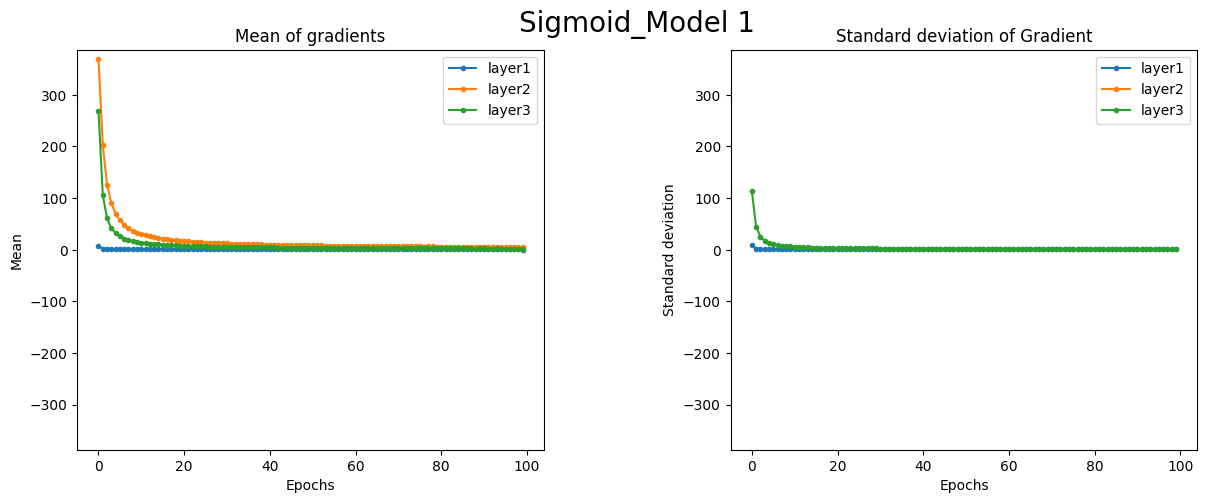

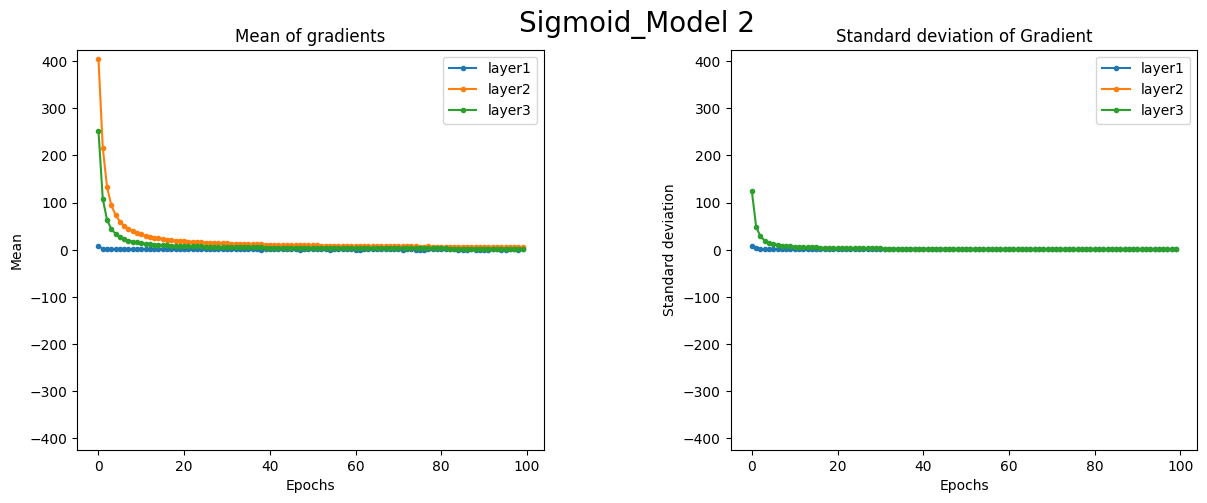

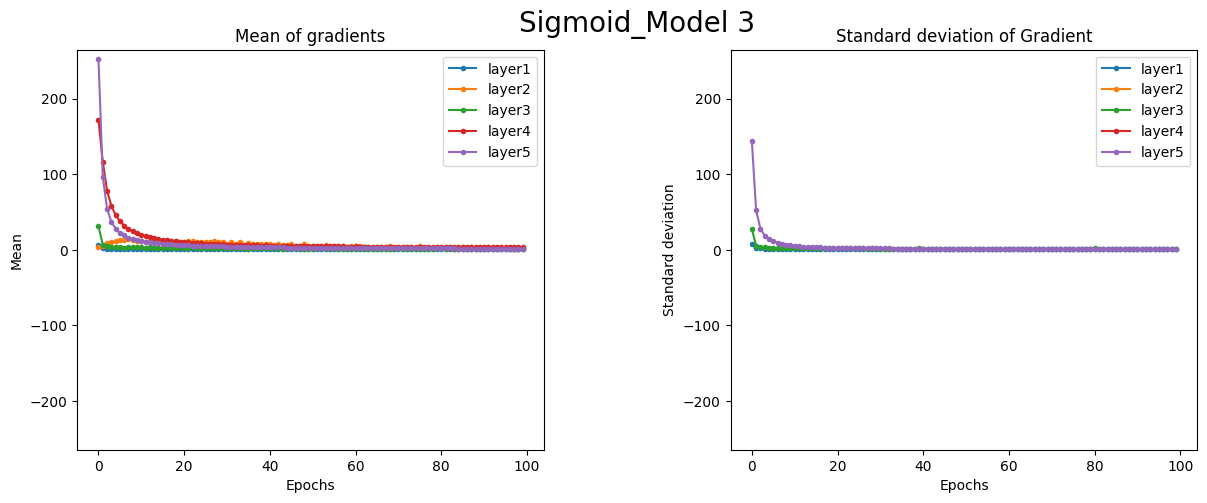

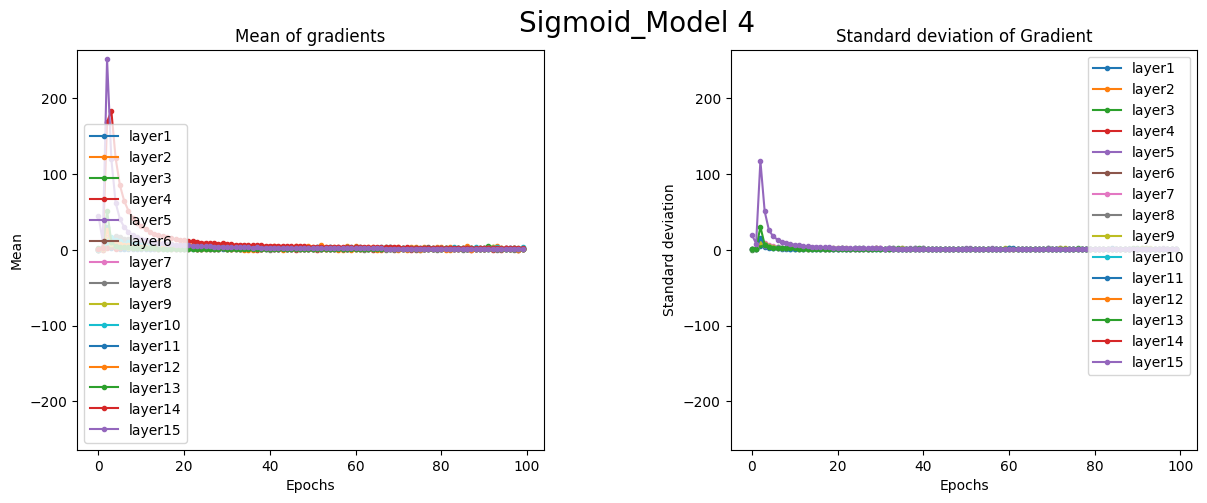

In [ ]:
import os

# Ensure the directory exists
os.makedirs("results", exist_ok=True)

# plots the gradients of each model using sigmoid activation
for indx,model in enumerate(gradients_sig_models):
    layers_list = [keys for keys in model.keys()]
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
    plt.suptitle("Sigmoid_Model "+str(indx+1),fontsize=20)
    for layer in layers_list:
        x = np.arange(len(model[layer]))
        ax1.plot(x,model[layer][:,0],label =layer,marker =".")
        ax1.set_title("Mean of gradients")
        ax1.set(xlabel="Epochs", ylabel="Mean")
        ax1.legend()

        ax2.plot(x,model[layer][:,1],label =layer,marker =".")
        ax2.set_title("Standard deviation of Gradient")
        ax2.set(xlabel="Epochs", ylabel="Standard deviation")
        ax2.legend()

    yabs_max_ax1 = abs(max(ax1.get_ylim(), key=abs))
    ax1.set_ylim(ymin=-yabs_max_ax1, ymax=yabs_max_ax1)
    yabs_max_ax2 = abs(max(ax1.get_ylim(), key=abs))
    ax2.set_ylim(ymin=-yabs_max_ax2, ymax=yabs_max_ax2)

    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    plt.savefig("./results/Sigmoid_Model_"+str(indx+1)+".png")
    plt.show()


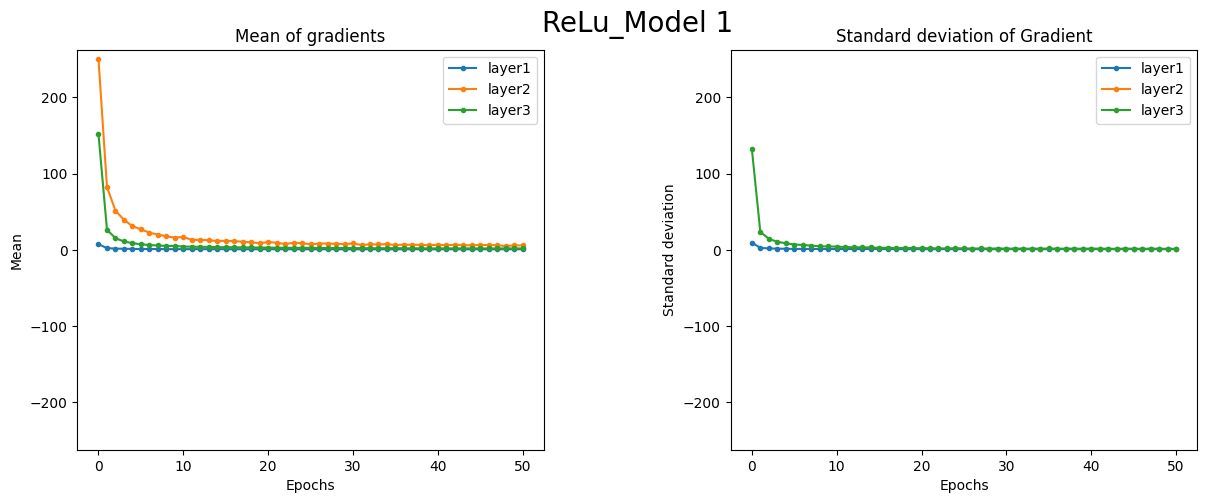

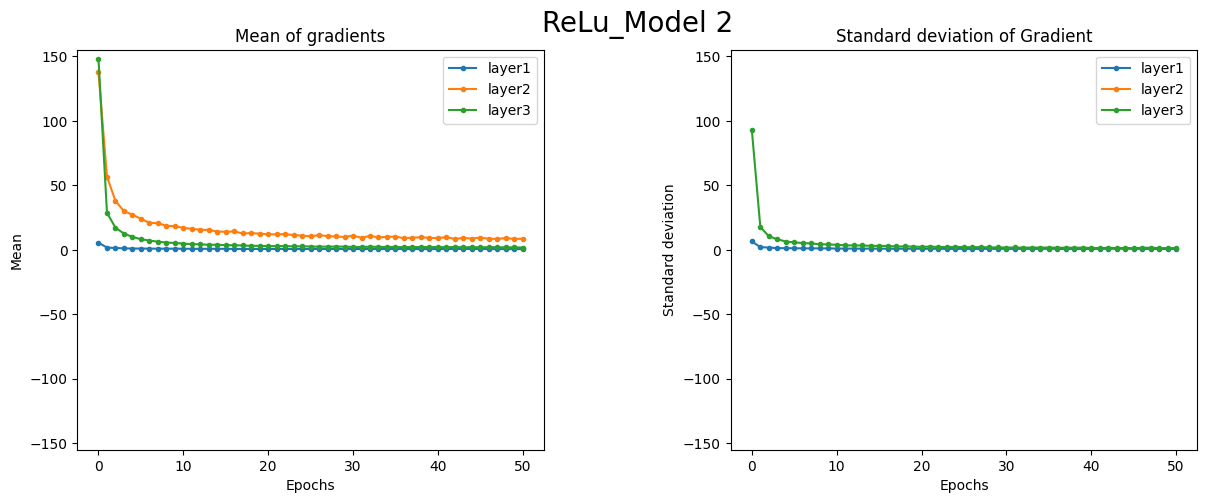

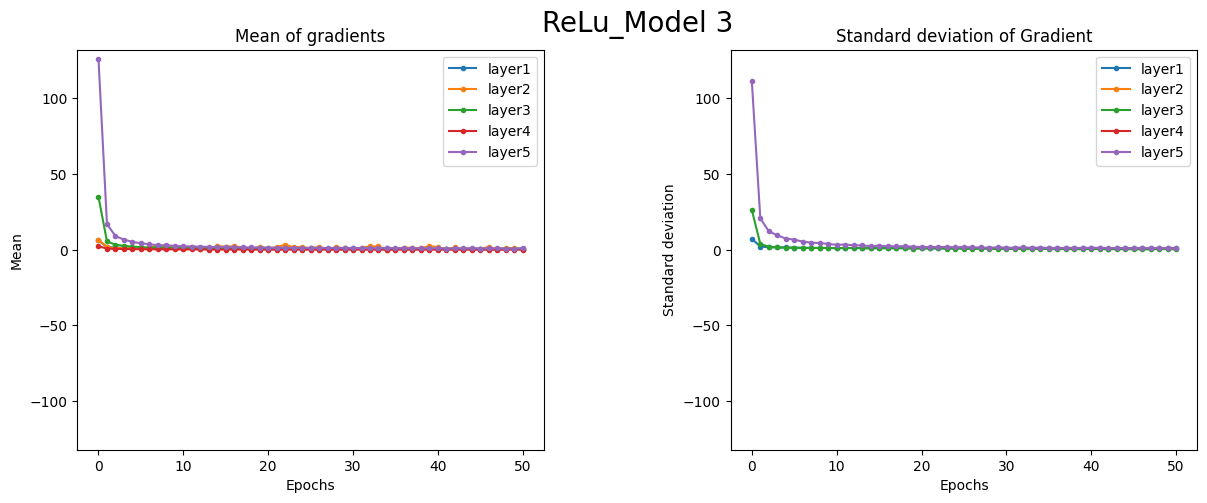

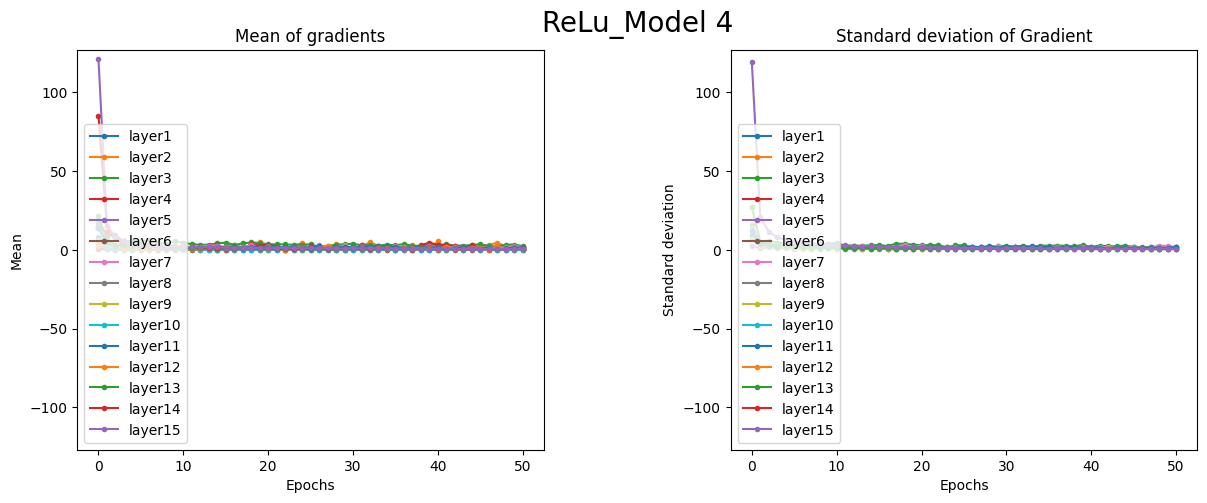

In [ ]:
# plots the gradients of each model using Relu activation
for indx,model in enumerate(gradients_relu_models):
    layers_list = [keys for keys in model.keys()]
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
    plt.suptitle("ReLu_Model "+str(indx+1),fontsize=20)
    for layer in layers_list:
        x = np.arange(len(model[layer]))
        ax1.plot(x,model[layer][:,0],label =layer,marker =".")
        ax1.set_title("Mean of gradients")
        ax1.set(xlabel="Epochs", ylabel="Mean")
        ax1.legend()
        ax2.plot(x,model[layer][:,1],label =layer,marker =".")
        ax2.set_title("Standard deviation of Gradient")
        ax2.set(xlabel="Epochs", ylabel="Standard deviation")
        ax2.legend()

    yabs_max_ax1 = abs(max(ax1.get_ylim(), key=abs))
    ax1.set_ylim(ymin=-yabs_max_ax1, ymax=yabs_max_ax1)
    yabs_max_ax2 = abs(max(ax1.get_ylim(), key=abs))
    ax2.set_ylim(ymin=-yabs_max_ax2, ymax=yabs_max_ax2)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    plt.savefig("./results/Relu_Model_"+str(indx+1)+".png")
    plt.show()
